<a href="https://colab.research.google.com/github/jihanamandasiagian/PCD/blob/main/Pengolahan_Citra_Digital_Kelompok_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from skimage.filters import threshold_otsu
from skimage.transform import resize
from skimage.feature import hog
from matplotlib import pyplot as plt

In [ ]:
data = np.load('character_font.npz')
images = data['images']
labels = data['labels']

In [ ]:
label_mapping = {i: chr(97 + i) for i in range(26)}

Visualisasi

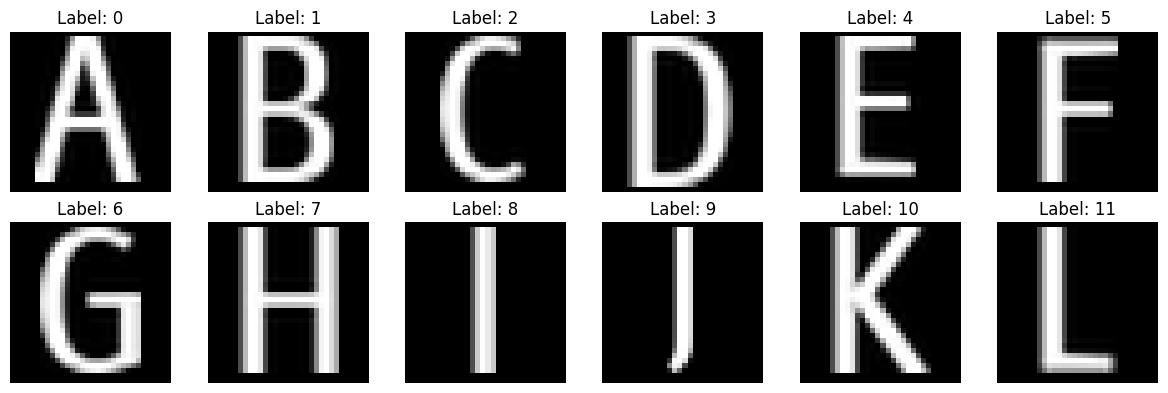

In [ ]:
num_samples = 12
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(2, 6, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Preprocessing

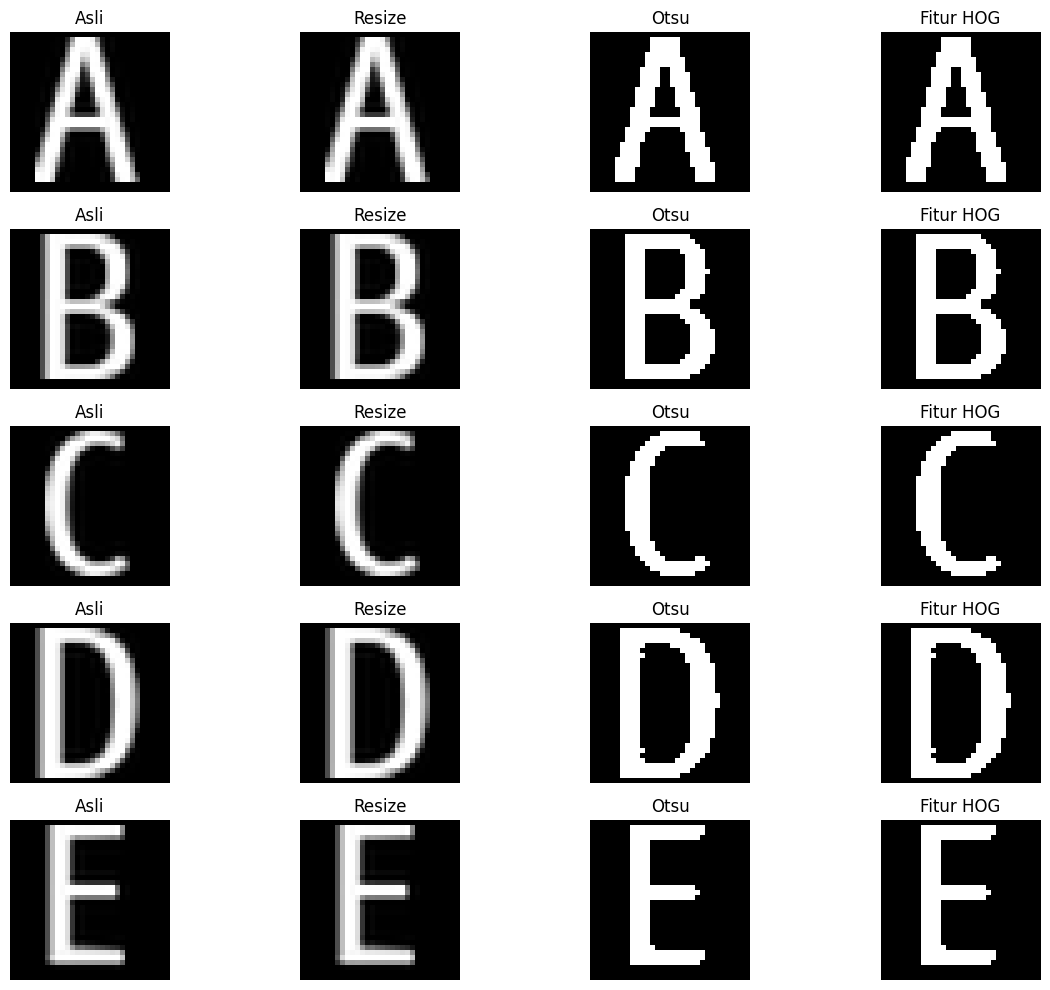

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
processed_images = []
hog_features_list = []

# Fungsi Ekstraksi HOG + Normalisasi
def extract_hog_features(img):
    hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    hog_features = scaler.fit_transform(hog_features.reshape(-1, 1)).flatten()
    return hog_features

# Visualisasi 5 contoh
plt.figure(figsize=(15, 10))
for idx, img in enumerate(images[:5]):
    plt.subplot(5, 5, idx * 5 + 1)
    plt.imshow(img.reshape(32, 32), cmap='gray')
    plt.title('Asli')
    plt.axis('off')

    img_resized = resize(img.reshape(32, 32), (32, 32), anti_aliasing=True)
    plt.subplot(5, 5, idx * 5 + 2)
    plt.imshow(img_resized, cmap='gray')
    plt.title('Resize')
    plt.axis('off')

    thresh = threshold_otsu(img_resized)
    img_otsu = img_resized > thresh
    plt.subplot(5, 5, idx * 5 + 3)
    plt.imshow(img_otsu, cmap='gray')
    plt.title('Otsu')
    plt.axis('off')

    hog_features = extract_hog_features(img_otsu)
    plt.subplot(5, 5, idx * 5 + 4)
    plt.imshow(img_otsu, cmap='gray')
    plt.title('Fitur HOG')
    plt.axis('off')

    processed_images.append(img_otsu)
    hog_features_list.append(hog_features)

processed_images = np.array(processed_images)
hog_features_list = np.array(hog_features_list)
plt.tight_layout()
plt.show()

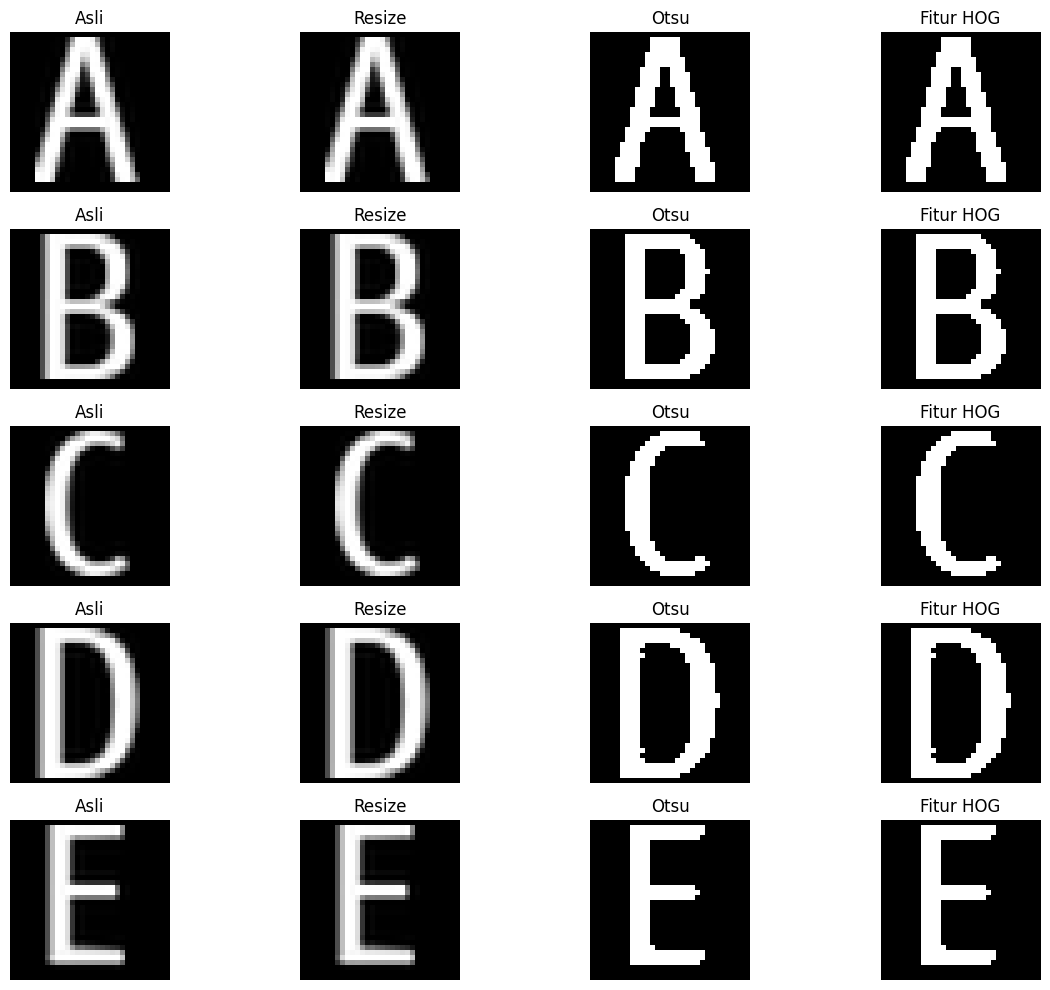

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_images = []

# Fungsi Ekstraksi HOG + Normalisasi
def extract_hog_features(img):
    hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    hog_features = scaler.fit_transform(hog_features.reshape(-1, 1)).flatten()
    return hog_features

# Visualisasi 5 contoh
plt.figure(figsize=(15, 10))
for idx, img in enumerate(images[:5]):
    plt.subplot(5, 5, idx * 5 + 1)
    plt.imshow(img.reshape(32, 32), cmap='gray')
    plt.title('Asli')
    plt.axis('off')

    img_resized = resize(img.reshape(32, 32), (32, 32), anti_aliasing=True)
    plt.subplot(5, 5, idx * 5 + 2)
    plt.imshow(img_resized, cmap='gray')
    plt.title('Resize')
    plt.axis('off')

    thresh = threshold_otsu(img_resized)
    img_otsu = img_resized > thresh
    plt.subplot(5, 5, idx * 5 + 3)
    plt.imshow(img_otsu, cmap='gray')
    plt.title('Otsu')
    plt.axis('off')

    hog_features = extract_hog_features(img_otsu)
    plt.subplot(5, 5, idx * 5 + 4)
    plt.imshow(img_otsu, cmap='gray')
    plt.title('Fitur HOG')
    plt.axis('off')

    normalized_images.append(hog_features)

normalized_images = np.array(normalized_images)
plt.tight_layout()
plt.show()

Fungsi Augmentasi Gambar

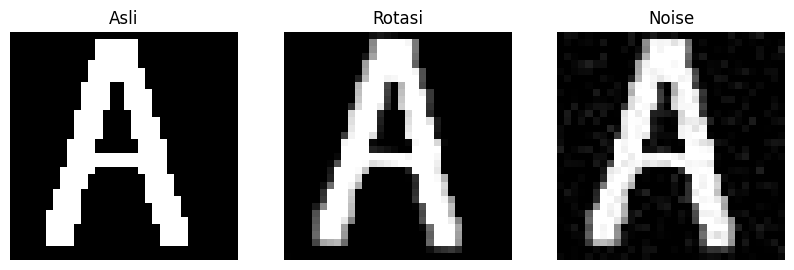

array([0.15494158, 0.06932175, 0.04275942, 0.03806168, 0.16345656,
       0.05582182, 0.        , 0.02386835, 0.        , 1.        ,
       1.        , 0.49684902, 0.21103902, 0.87256768, 0.24921598,
       0.04721338, 0.        , 0.18061603, 0.32471023, 0.04642439,
       0.11134683, 0.02868978, 0.23589894, 0.03691471, 0.0481077 ,
       0.07772563, 0.03387695, 1.        , 0.55048432, 1.        ,
       0.055782  , 0.05973099, 0.        , 0.04004094, 0.02553758,
       1.        , 0.76987403, 0.76987403, 0.29692781, 0.12612152,
       0.52146548, 0.14893691, 0.02821575, 0.        , 0.10794008,
       0.75288476, 0.00929934, 0.00587276, 0.        , 0.20435941,
       0.16749167, 0.04408407, 0.61377102, 0.62533477, 0.76987403,
       0.32898144, 0.76987403, 0.03333654, 0.03569654, 0.        ,
       0.02392934, 0.01526181, 0.66605887, 0.76987403, 0.        ,
       0.01506046, 0.01530008, 0.03140159, 0.02308708, 0.76987403,
       0.43409667, 0.76987403, 0.95741849, 0.01812135, 0.01144

In [ ]:
def augment_image(img, show=False):
    img = img.reshape(32, 32)
    rows, cols = img.shape

    # Convert boolean image to uint8 (0 or 255)
    img_uint8 = img.astype(np.uint8) * 255

    angle = np.random.uniform(-20, 20)
    # Use the uint8 image for warpAffine
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated = cv2.warpAffine(img_uint8, M, (cols, rows), borderValue=1) # Note: borderValue=1 might be problematic for uint8, consider 0 or 255 depending on desired background color

    # Convert back to float for noise addition and clipping if necessary, or adjust noise parameters
    rotated_float = rotated.astype(np.float32) / 255.0 # Convert back to float 0-1 range if subsequent steps expect it

    noise = np.random.normal(0, 0.05, (32, 32))
    noisy_img = rotated_float + noise
    noisy_img = np.clip(noisy_img, 0, 1)

    if show:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray') # Display original boolean image for comparison
        plt.title('Asli')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(rotated, cmap='gray') # Display rotated uint8 image
        plt.title('Rotasi')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(noisy_img, cmap='gray') # Display final noisy image
        plt.title('Noise')
        plt.axis('off')

        plt.show()

    # Ensure extract_hog_features can handle the data type of noisy_img (likely float 0-1)
    hog_features = extract_hog_features(noisy_img)
    return hog_features

# Contoh Visualisasi Augmentasi
augment_image(processed_images[0], show=True)

In [ ]:
X_aug = []
y_aug = []

for img, label in zip(processed_images, labels[:len(processed_images)]):
    for _ in range(3):
        aug_img = augment_image(img)
        X_aug.append(aug_img)
        y_aug.append(label)

X_combined = np.concatenate((hog_features_list, np.array(X_aug)), axis=0)
y_combined = np.concatenate((labels[:len(hog_features_list)], np.array(y_aug)), axis=0)


Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

Evaluasi

In [ ]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

Akurasi Model: 50.00%


Fungsi Segmentasi Karakter

In [ ]:
def segment_characters(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes = [cv2.boundingRect(c) for c in contours]
    boxes = sorted(boxes, key=lambda b: b[0])

    segmented = []
    plt.figure(figsize=(15, 4))
    for i, (x, y, w, h) in enumerate(boxes):
        char = thresh[y:y + h, x:x + w]
        resized = cv2.resize(char, (32, 32))
        char_float = resized.astype(float) / 255.0
        segmented.append(char_float)

        plt.subplot(1, len(boxes), i+1)
        plt.imshow(resized, cmap='gray')
        plt.title(f'Karakter {i+1}')
        plt.axis('off')

    plt.show()
    return segmented

In [ ]:
def predict_text_from_image(image_path):
    segmented_chars = segment_characters(image_path)
    predicted_text = ''

    for char in segmented_chars:
        hog_features = extract_hog_features(char).reshape(1, -1)
        prediction = svm.predict(hog_features)[0]

        # Konversi label angka ke huruf
        if prediction in label_mapping:
            predicted_text += label_mapping[prediction]
        else:
            predicted_text += '?'

    return predicted_text

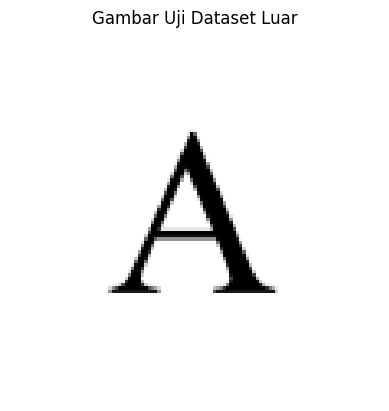

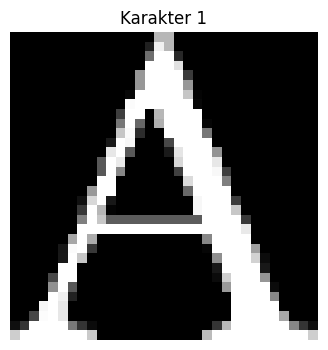

Hasil Prediksi Dataset Luar: a


In [ ]:
test_image_path = 'A.png'

img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Gambar Uji Dataset Luar')
plt.axis('off')
plt.show()

predicted_result = predict_text_from_image(test_image_path)
print('Hasil Prediksi Dataset Luar:', predicted_result)

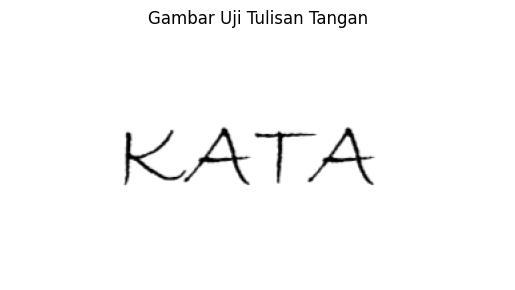

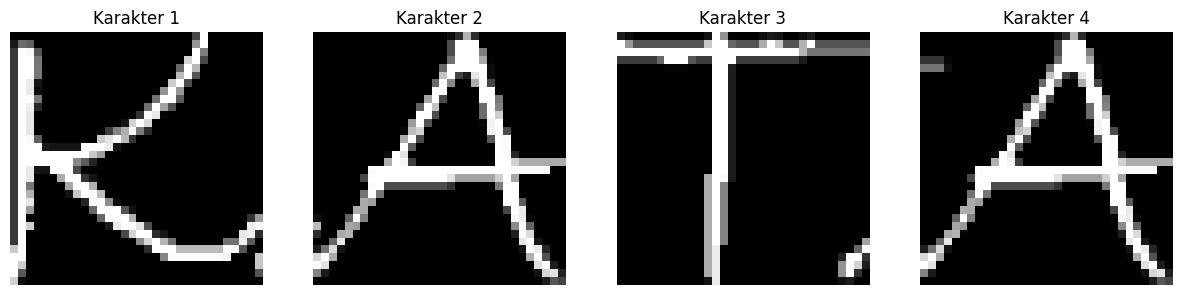

Hasil Prediksi Tulisan Tangan: caca


In [ ]:
handwritten_image_path = 'kata.png'

img = cv2.imread(handwritten_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Gambar Uji Tulisan Tangan')
plt.axis('off')
plt.show()

predicted_result_handwriting = predict_text_from_image(handwritten_image_path)
print('Hasil Prediksi Tulisan Tangan:', predicted_result_handwriting)